<a href="https://colab.research.google.com/github/arielabade/dataAnalysis/blob/main/salesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd


## Loading Data

In [ ]:
data = pd.read_csv('/content/KAG_conversion_data.csv')

In [ ]:
data.head()


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


## Sampling


In [ ]:
adsSales = pd.read_csv('/content/KAG_conversion_data.csv',
                       usecols=['Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'])

In [ ]:
adsSales

,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,1.430000,2,1
1,2,1.820000,2,0
2,0,0.000000,1,0
3,1,1.250000,1,0
4,1,1.290000,1,1
...,...,...,...,...
1138,252,358.189997,13,2
1139,120,173.880003,3,0
1140,28,40.289999,2,0
1141,135,198.710001,8,2


In [ ]:
adsSales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Clicks               1143 non-null   int64  
 1   Spent                1143 non-null   float64
 2   Total_Conversion     1143 non-null   int64  
 3   Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 35.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler


# Inicializando o scaler
scaler = StandardScaler()

# Aplicando a transformação aos
scaler.fit_transform(adsSales)

# Agora 'X_scaled' contém os dados normalizados


array([[-0.5695727 , -0.57477185, -0.19092221,  0.03223643],
       [-0.55198797, -0.57028241, -0.19092221, -0.54348614],
       [-0.58715742, -0.59123316, -0.41405523, -0.54348614],
       ...,
       [-0.09478519, -0.12743878, -0.19092221, -0.54348614],
       [ 1.7867801 ,  1.69619753,  1.14787588,  0.60795901],
       [ 1.41750093,  1.31517011,  0.47847683,  0.60795901]])

In [ ]:
adsSales.head()

,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,1.43,2,1
1,2,1.82,2,0
2,0,0.00,1,0
3,1,1.25,1,0
4,1,1.29,1,1


## Memory Treatment

In [ ]:
!pip install dtype_diet

In [ ]:
from dtype_diet import report_on_dataframe
report_on_dataframe(adsSales)

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Clicks,int64,int16,4.527344,1.178711,3.348633,73.964625
Spent,float64,None,4.527344,NaN,NaN,NaN
Total_Conversion,int64,int8,4.527344,0.620605,3.906738,86.292062
Approved_Conversion,int64,int8,4.527344,0.620605,3.906738,86.292062


In [ ]:

adsSales['Clicks'] = adsSales['Clicks'].astype('int8')
adsSales['Total_Conversion'] = adsSales['Total_Conversion'].astype('int8')
adsSales['Approved_Conversion'] = adsSales['Approved_Conversion'].astype('int8')

In [ ]:
adsSales.info()
#redução do espaço ocupado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Impressions          1143 non-null   int32  
 1   Clicks               1143 non-null   int8   
 2   Spent                1143 non-null   float64
 3   Total_Conversion     1143 non-null   int8   
 4   Approved_Conversion  1143 non-null   int8   
dtypes: float64(1), int32(1), int8(3)
memory usage: 16.9 KB


## Data Treatment


In [ ]:
y = adsSales['Approved_Conversion']


In [ ]:
y

0       1
1       0
2       0
3       0
4       1
       ..
1138    2
1139    0
1140    0
1141    2
1142    2
Name: Approved_Conversion, Length: 1143, dtype: int64

In [ ]:
print(adsSales.columns)

Index(['Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'], dtype='object')


In [ ]:
adsSales

,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,1.430000,2,1
1,2,1.820000,2,0
2,0,0.000000,1,0
3,1,1.250000,1,0
4,1,1.290000,1,1
...,...,...,...,...
1138,252,358.189997,13,2
1139,120,173.880003,3,0
1140,28,40.289999,2,0
1141,135,198.710001,8,2


In [ ]:
import pandas as pd

# Cálculo do IQR para cada variável
Q1 = adsSales[['Clicks', 'Spent', 'Total_Conversion']].quantile(0.25)
Q3 = adsSales[['Clicks', 'Spent', 'Total_Conversion']].quantile(0.75)
IQR = Q3 - Q1

# Definição dos limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Substituir os valores que são outliers por 0 no próprio DataFrame original
adsSales.loc[
    (adsSales['Clicks'] < limite_inferior['Clicks']) | (adsSales['Clicks'] > limite_superior['Clicks']) |
    (adsSales['Spent'] < limite_inferior['Spent']) | (adsSales['Spent'] > limite_superior['Spent']) |
    (adsSales['Total_Conversion'] < limite_inferior['Total_Conversion']) | (adsSales['Total_Conversion'] > limite_superior['Total_Conversion']),
    ['Clicks', 'Spent', 'Total_Conversion']
] = 0

# Agora, 'adsSales' contém os dados com os outliers substituídos por 0


In [ ]:
adsSales

,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,1.430000,2,1
1,2,1.820000,2,0
2,0,0.000000,1,0
3,1,1.250000,1,0
4,1,1.290000,1,1
...,...,...,...,...
1138,0,0.000000,0,2
1139,0,0.000000,0,0
1140,28,40.289999,2,0
1141,0,0.000000,0,2


In [ ]:
# Arredonda a coluna 'Spent' para 2 casas decimais
adsSales['Spent'] = adsSales['Spent'].round(2)


In [ ]:
adsSales

,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,1.43,2,1
1,2,1.82,2,0
2,0,0.00,1,0
3,1,1.25,1,0
4,1,1.29,1,1
...,...,...,...,...
1138,0,0.00,0,2
1139,0,0.00,0,0
1140,28,40.29,2,0
1141,0,0.00,0,2


In [ ]:
y = adsSales['Approved_Conversion']

In [ ]:
y

0       1
1       0
2       0
3       0
4       1
       ..
1138    2
1139    0
1140    0
1141    2
1142    2
Name: Approved_Conversion, Length: 1143, dtype: int64

In [ ]:
x = adsSales.drop(['Approved_Conversion'], axis = 1)

In [ ]:
x

,Clicks,Spent,Total_Conversion
0,1,1.43,2
1,2,1.82,2
2,0,0.00,1
3,1,1.25,1
4,1,1.29,1
...,...,...,...
1138,0,0.00,0
1139,0,0.00,0
1140,28,40.29,2
1141,0,0.00,0


## Data Analysis


In [ ]:
import seaborn as sns


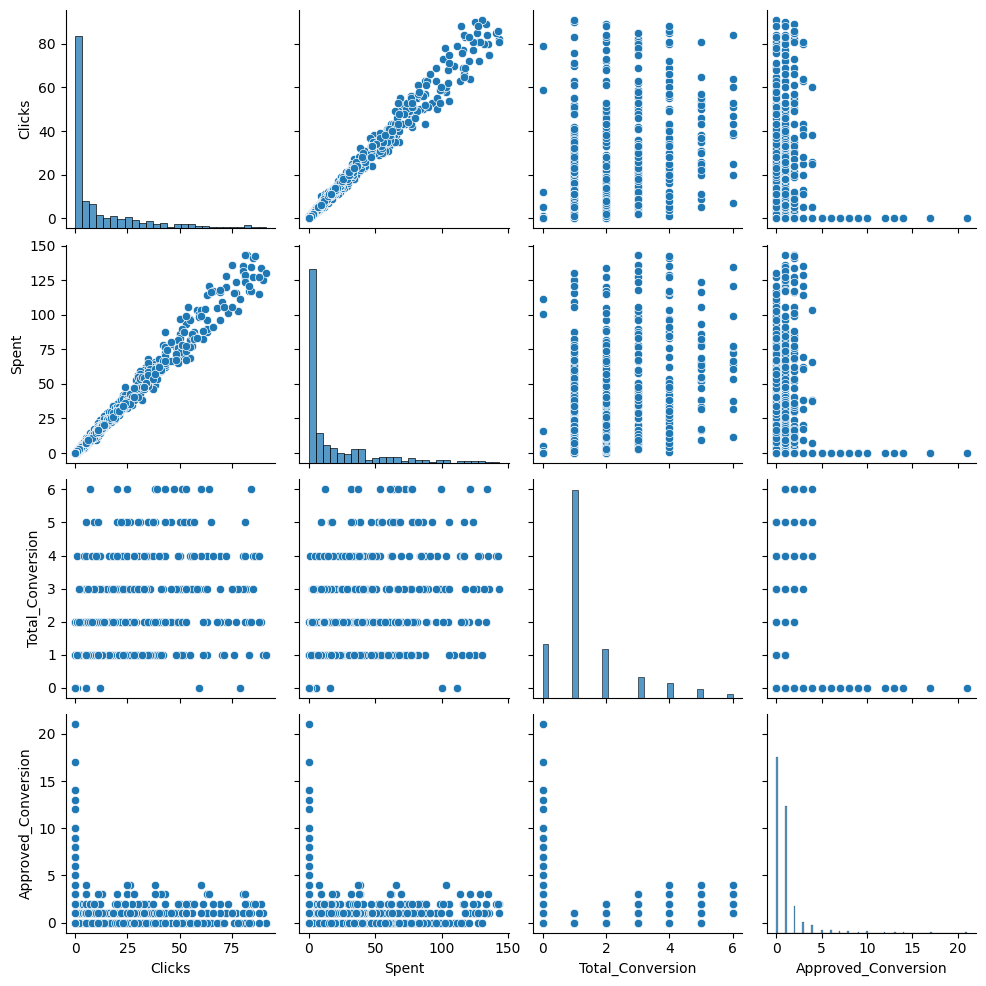

In [ ]:
sns.pairplot(adsSalesCopy)

<Axes: >

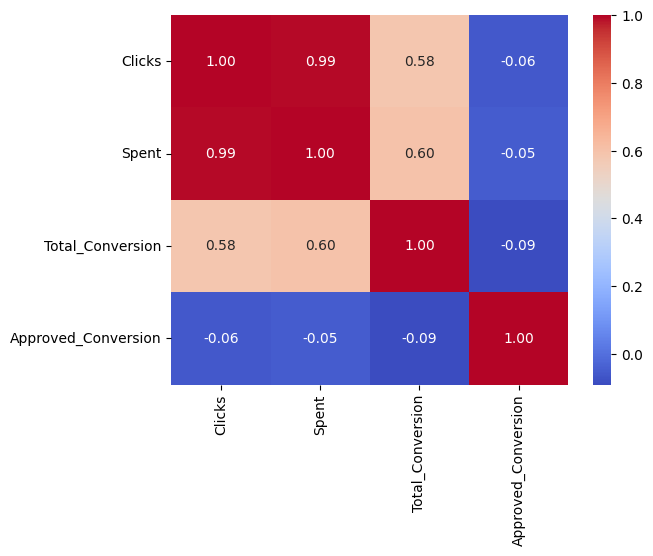

In [ ]:
correlation = adsSalesCopy.corr()
sns.heatmap(correlation, annot=True, cmap = "coolwarm",fmt=".2f")

<Axes: >

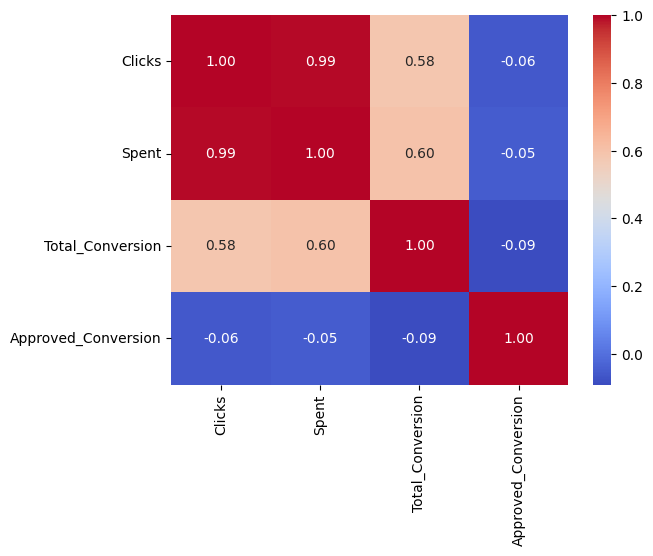

In [ ]:
sns.heatmap(adsSalesCopy.corr(), annot=True, fmt='.2f', cmap='coolwarm')

## Building the model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
print("Tamanho de x:", x.shape)
print("Tamanho de y:", y.shape)

Tamanho de x: (1143, 3)
Tamanho de y: (1143,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 3) (343, 3) (800,) (343,)


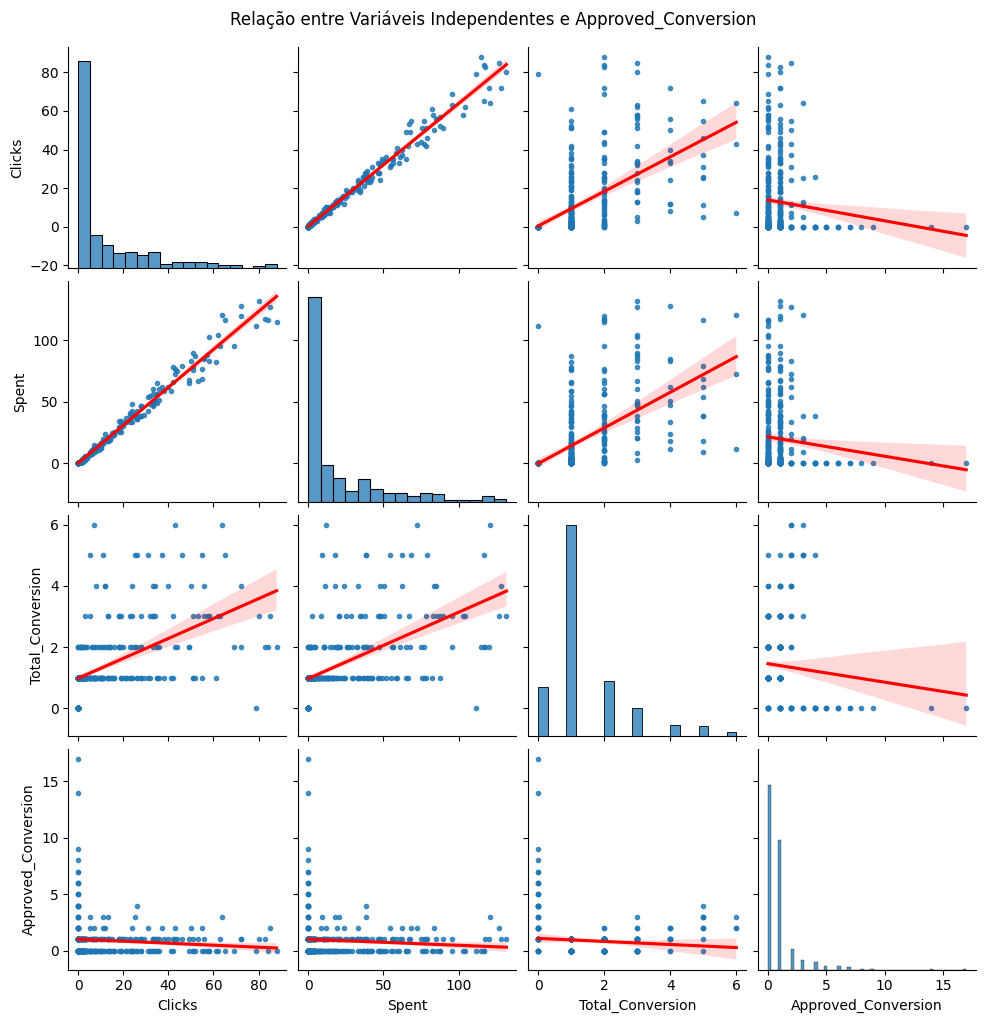

In [ ]:
import seaborn as sns

# Adiciona a variável 'Approved_Conversion' ao conjunto de dados x_test
x_test_with_target = x_test.copy()
x_test_with_target['Approved_Conversion'] = y_test

# Criação da matriz de dispersão
sns.pairplot(x_test_with_target, kind='reg', markers='.', plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle('Relação entre Variáveis Independentes e Approved_Conversion', y=1.02)
plt.show()

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)
p = model.predict(x_test)
print(p)

[ 1.08576106  0.99607346  0.99368213  1.02009893  1.16626325  1.1267244
  0.40664852  0.99788637  0.6923593   0.99748926  0.99452816  1.04968034
  1.0193047   0.72771989  1.1603447   0.99368213  0.99368213  1.1603447
  0.93542708  0.82701956  0.75700281  0.31529107  0.98549811  0.85937583
  1.13814574  0.98974551  1.1603447   1.00926459  0.99368213  1.1603447
  0.99368213  0.6895277   0.61327298  0.59474665  1.04961495  1.03063111
  0.95798494  0.99001313  0.86633769  0.97877305  1.03284114  0.96142582
  0.98577437  0.94727145  1.1603447   1.1603447   1.0656895   1.1603447
  0.43988534  1.02611608  0.99368213  0.8888351   0.96779693  0.99368213
  0.89272856  0.37080084  1.25493216  1.1603447   0.82701956  0.64686746
  1.07406841  0.8305159   0.82841812  0.66659871  0.98674125  0.94121113
  1.1603447   1.05816157  0.99368213  1.00496538  0.91252021  0.99368213
  1.1603447   0.36524125  0.8837466   0.99009946  0.98443625  0.66286921
  1.1603447   1.03133902  0.20855833  0.98974551  1.021

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, p))

1.7181870756440167

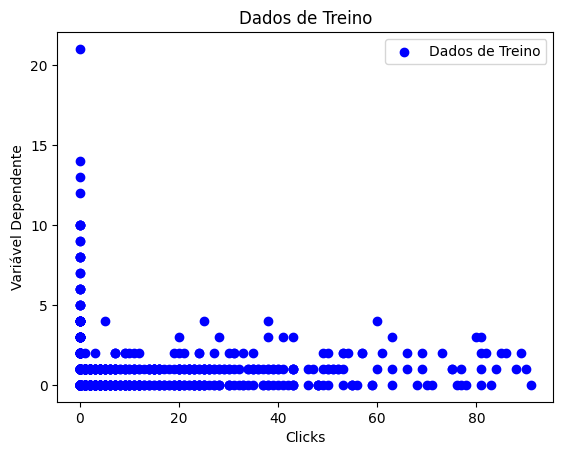

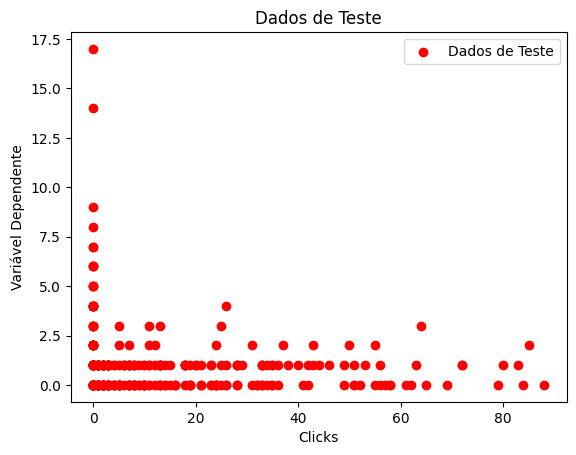

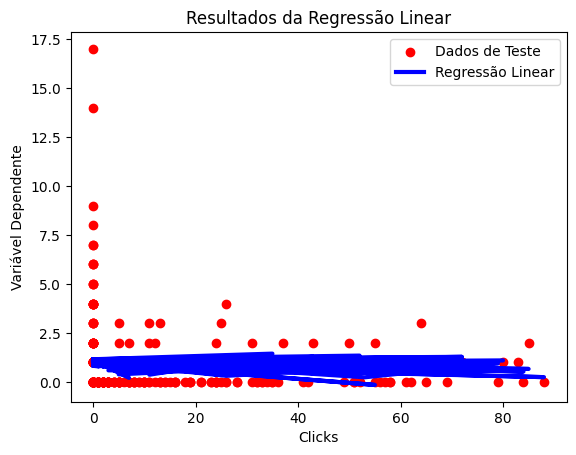

In [ ]:
import matplotlib.pyplot as plt
# Escolha da variável específica para a visualização
variavel_escolhida = x.columns[0]  # Usando a primeira variável independente

# Visualização dos dados de treino
plt.scatter(x_train[variavel_escolhida], y_train, color='blue', label='Dados de Treino')
plt.title('Dados de Treino')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

# Visualização dos dados de teste
plt.scatter(x_test[variavel_escolhida], y_test, color='red', label='Dados de Teste')
plt.title('Dados de Teste')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

# Visualização dos resultados da regressão
plt.scatter(x_test[variavel_escolhida], y_test, color='red', label='Dados de Teste')
plt.plot(x_test[variavel_escolhida], p, color='blue', linewidth=3, label='Regressão Linear')
plt.title('Resultados da Regressão Linear')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

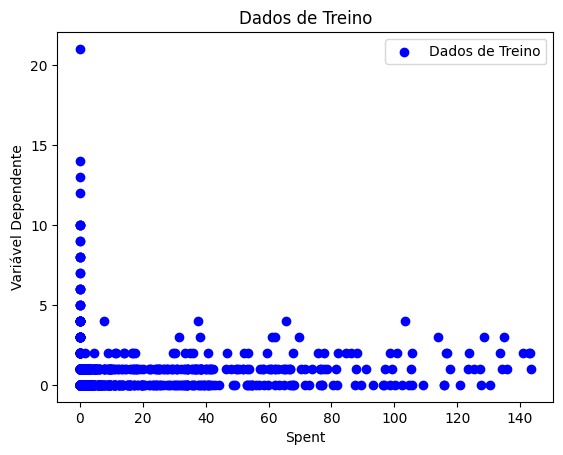

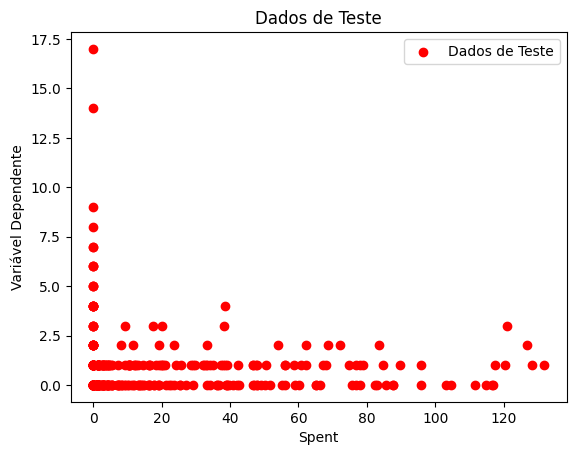

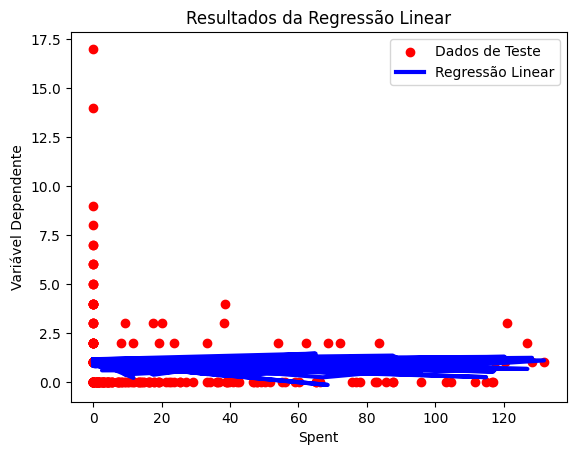

In [ ]:
import matplotlib.pyplot as plt
# Escolha da variável específica para a visualização
variavel_escolhida = x.columns[1]  # Usando a primeira variável independente

# Visualização dos dados de treino
plt.scatter(x_train[variavel_escolhida], y_train, color='blue', label='Dados de Treino')
plt.title('Dados de Treino')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

# Visualização dos dados de teste
plt.scatter(x_test[variavel_escolhida], y_test, color='red', label='Dados de Teste')
plt.title('Dados de Teste')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

# Visualização dos resultados da regressão
plt.scatter(x_test[variavel_escolhida], y_test, color='red', label='Dados de Teste')
plt.plot(x_test[variavel_escolhida], p, color='blue', linewidth=3, label='Regressão Linear')
plt.title('Resultados da Regressão Linear')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

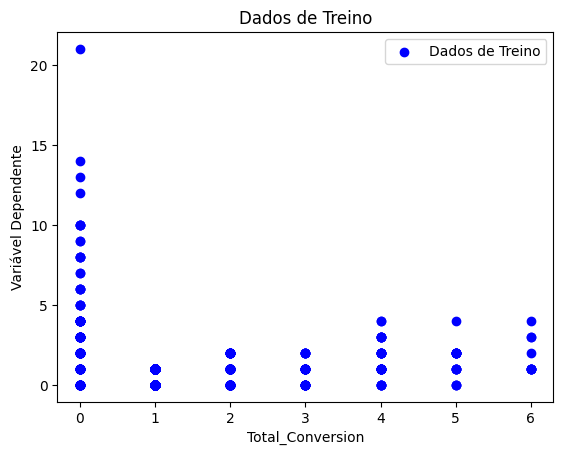

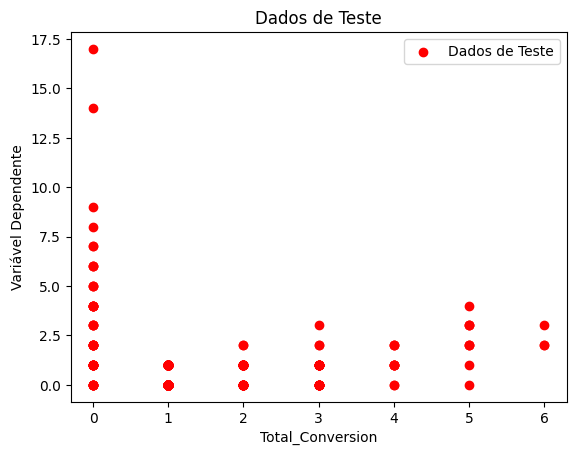

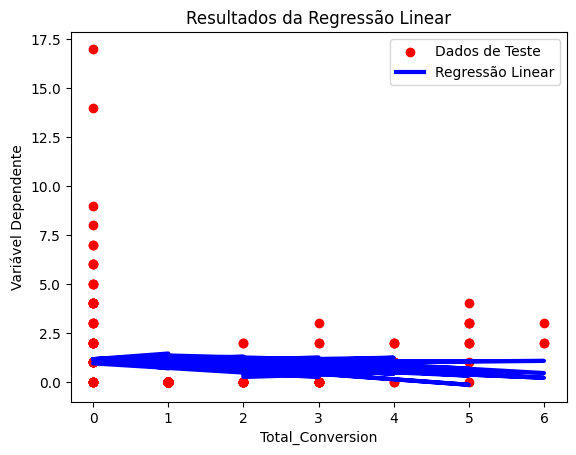

In [ ]:
import matplotlib.pyplot as plt
# Escolha da variável específica para a visualização
variavel_escolhida = x.columns[2]  # Usando a primeira variável independente

# Visualização dos dados de treino
plt.scatter(x_train[variavel_escolhida], y_train, color='blue', label='Dados de Treino')
plt.title('Dados de Treino')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

# Visualização dos dados de teste
plt.scatter(x_test[variavel_escolhida], y_test, color='red', label='Dados de Teste')
plt.title('Dados de Teste')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

# Visualização dos resultados da regressão
plt.scatter(x_test[variavel_escolhida], y_test, color='red', label='Dados de Teste')
plt.plot(x_test[variavel_escolhida], p, color='blue', linewidth=3, label='Regressão Linear')
plt.title('Resultados da Regressão Linear')
plt.xlabel(variavel_escolhida)
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

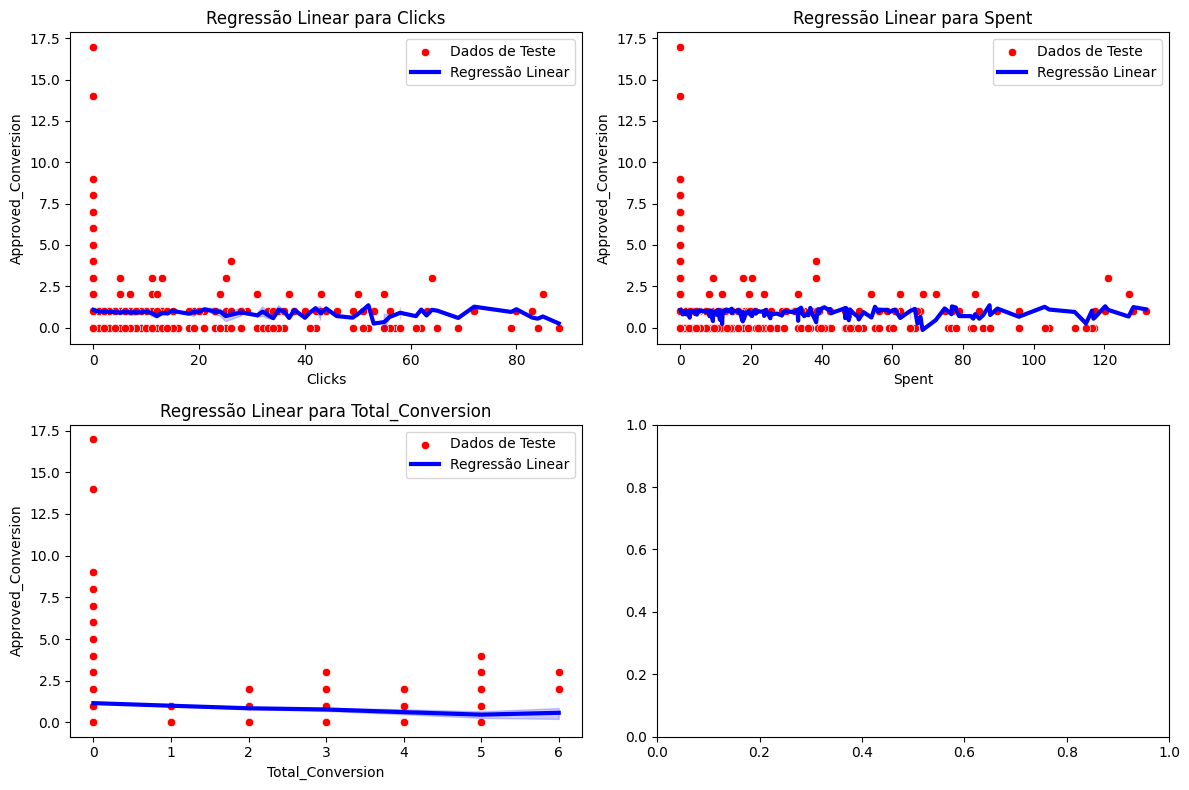

In [ ]:
import seaborn as sns

# Escolha das variáveis específicas para a visualização
variaveis_escolhidas = [ 'Clicks', 'Spent', 'Total_Conversion']

# Criação de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop para criar gráficos de dispersão para cada variável
for i, variavel in enumerate(variaveis_escolhidas):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=x_test[variavel], y=y_test, ax=axes[row, col], color='red', label='Dados de Teste')
    sns.lineplot(x=x_test[variavel], y=p, ax=axes[row, col], color='blue', linewidth=3, label='Regressão Linear')
    axes[row, col].set_title(f'Regressão Linear para {variavel}')
    axes[row, col].set_xlabel(variavel)
    axes[row, col].set_ylabel('Approved_Conversion')
    axes[row, col].legend()

# Ajuste de layout
plt.tight_layout()
plt.show()


## Benchmarking


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Avaliação do modelo
mae = mean_absolute_error(y_test, p)
mse = mean_squared_error(y_test, p)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, p)

# Imprimir os resultados
print(f'MAE (Erro Médio Absoluto): {mae:.2f}')
print(f'MSE (Erro Quadrático Médio): {mse:.2f}')
print(f'RMSE (Raiz Quadrada do Erro Quadrático Médio): {rmse:.2f}')
print(f'R² (Coeficiente de Determinação): {r2:.2f}')

# Interpretação dos resultados
print("\nInterpretação dos resultados:")
print(f"MAE indica que o modelo tem um erro médio de {mae:.2f} unidades na variável 'Approved_Conversion'.")
print(f"MSE penaliza erros maiores, resultando em um valor de {mse:.2f}.")
print(f"RMSE, na mesma unidade que 'Approved_Conversion', é {rmse:.2f}.")
print(f"R² indica que aproximadamente {r2*100:.2f}% da variabilidade em 'Approved_Conversion' é explicada pelo modelo.")


MAE (Erro Médio Absoluto): 0.95
MSE (Erro Quadrático Médio): 2.95
RMSE (Raiz Quadrada do Erro Quadrático Médio): 1.72
R² (Coeficiente de Determinação): 0.01

Interpretação dos resultados:
MAE indica que o modelo tem um erro médio de 0.95 unidades na variável 'Approved_Conversion'.
MSE penaliza erros maiores, resultando em um valor de 2.95.
RMSE, na mesma unidade que 'Approved_Conversion', é 1.72.
R² indica que aproximadamente 0.90% da variabilidade em 'Approved_Conversion' é explicada pelo modelo.
